In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_93.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_51.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_11.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_16.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_45.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_96.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_91.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_90.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_2.txt
/kaggle/input/riped-and-unriped-

# Load data and preprocessing

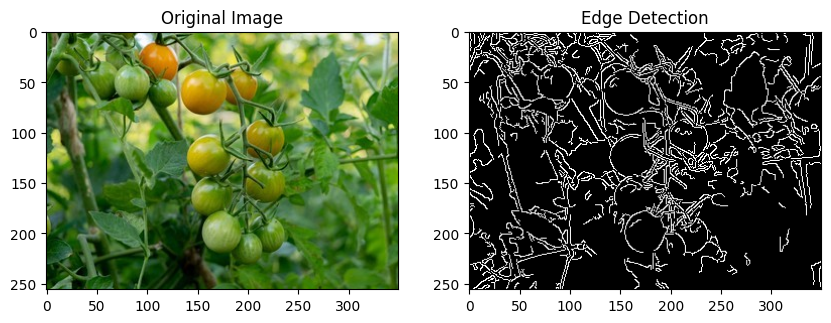

Labels for the image: [['1', '0.446946', '0.228366', '0.122019', '0.193065'], ['1', '0.320129', '0.110747', '0.111051', '0.135895'], ['1', '0.564167', '0.196032', '0.102825', '0.195876'], ['1', '0.623462', '0.411590', '0.113108', '0.160262'], ['1', '0.457229', '0.462199', '0.175488', '0.197751'], ['0', '0.464426', '0.636520', '0.143270', '0.126523'], ['0', '0.487733', '0.771478', '0.132302', '0.173383'], ['0', '0.630317', '0.774289', '0.106253', '0.150890'], ['0', '0.582332', '0.846454', '0.100769', '0.141518'], ['0', '0.331782', '0.244767', '0.078147', '0.111528'], ['0', '0.146012', '0.186660', '0.095970', '0.156514'], ['0', '0.242324', '0.204936', '0.098027', '0.144330'], ['0', '0.072663', '0.099500', '0.123390', '0.158388'], ['0', '0.209420', '0.094814', '0.091172', '0.135895'], ['1', '0.620720', '0.580756', '0.126818', '0.161200']]


In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Path to folder
images_path = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images'
labels_path = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels'

# Create a list of image and label files
image_files = sorted([f for f in os.listdir(images_path) if f.endswith('.jpeg')])
label_files = sorted([f for f in os.listdir(labels_path) if f.endswith('.txt')])

# Check if the number of images and labels match
assert len(image_files) == len(label_files), "The number of images and labels does not match."

# Read data from the label file
def read_labels(label_path):
    with open(label_path, 'r') as f:
        labels = [line.strip().split() for line in f]
    return labels

# Edge Detection
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

# Example
example_image = os.path.join(images_path, image_files[0])
example_label = os.path.join(labels_path, label_files[0])

edges = preprocess_image(example_image)
labels = read_labels(example_label)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(example_image), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

print("Labels for the image:", labels)

In [4]:
# Create lists of full paths to the images and labels
image_paths = [os.path.join(images_path, img) for img in image_files]
label_paths = [os.path.join(labels_path, lbl) for lbl in label_files]

# Split data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    image_paths, label_paths, test_size=0.2, random_state=42
)

print(f"Number of training images: {len(train_images)}")
print(f"Number of test images: {len(test_images)}")

Number of training images: 141
Number of test images: 36


In [5]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 608.9 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 5.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import shutil

# Create new directories for YOLOv8
dataset_path = '/kaggle/working/'
os.makedirs(os.path.join(dataset_path, 'images/train'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'images/val'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'labels/train'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'labels/val'), exist_ok=True)

# Move images and labels to their corresponding directories
for img_path, lbl_path in zip(train_images, train_labels):
    shutil.copy(img_path, os.path.join(dataset_path, 'images/train'))
    shutil.copy(lbl_path, os.path.join(dataset_path, 'labels/train'))

for img_path, lbl_path in zip(test_images, test_labels):
    shutil.copy(img_path, os.path.join(dataset_path, 'images/val'))
    shutil.copy(lbl_path, os.path.join(dataset_path, 'labels/val'))

# Model creation

In [7]:
dataset_yaml = """
train: /kaggle/working/images/train
val: /kaggle/working/images/val

nc: 2  # number of classes
names: ['unripe', 'ripe']  # class names
"""

with open('/kaggle/working/tomatoes.yaml', 'w') as file:
    file.write(dataset_yaml)

# Model training

In [8]:
from ultralytics import YOLO
from IPython.display import Image, display

# Load the trained YOLO model
model = YOLO('yolov8n.pt')
data_yaml_path = "/kaggle/working/tomatoes.yaml"

results = model.train(data = data_yaml_path,
            epochs=130,
            imgsz=640,
            device=0,
            lr0=0.01,  # initial learning rate
            lrf=0.001,  # final learning rate
            save_period=10 
           )

100%|██████████| 6.25M/6.25M [00:00<00:00, 77.8MB/s]


Ultralytics YOLOv8.2.75 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/tomatoes.yaml, epochs=130, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]
2024-08-09 13:02:36,255	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-09 13:02:37,181	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/labels/train... 141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 141/141 [00:00<00:00, 1041.01it/s]

train: New cache created: /kaggle/working/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/labels/val... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 1433.27it/s]

val: New cache created: /kaggle/working/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 130 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/130      2.36G      1.438      3.072      1.576        173        640: 100%|██████████| 9/9 [00:06<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         36        166     0.0125      0.814      0.295      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/130      2.17G      1.387      2.167      1.466        146        640: 100%|██████████| 9/9 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         36        166     0.0156      0.812      0.401      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/130      2.26G      1.367      1.625      1.437        159        640: 100%|██████████| 9/9 [00:01<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all         36        166      0.647      0.162      0.419      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/130      2.18G       1.34      1.384      1.468        140        640: 100%|██████████| 9/9 [00:01<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         36        166      0.664      0.444      0.458      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/130      2.19G      1.327      1.278      1.403        139        640: 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         36        166      0.684      0.553      0.559      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/130      2.18G      1.277      1.178      1.373        128        640: 100%|██████████| 9/9 [00:01<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         36        166      0.703      0.561        0.6      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/130      2.21G      1.296      1.189      1.367        128        640: 100%|██████████| 9/9 [00:01<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         36        166      0.775      0.537      0.623      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/130       2.2G      1.245      1.111      1.334        167        640: 100%|██████████| 9/9 [00:01<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         36        166      0.795      0.462      0.531      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/130      2.25G      1.244       1.08      1.339        139        640: 100%|██████████| 9/9 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         36        166      0.802      0.534      0.629       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/130       2.2G      1.282      1.055      1.371        138        640: 100%|██████████| 9/9 [00:01<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         36        166      0.701      0.522      0.609      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/130      2.19G      1.282      1.094      1.395        170        640: 100%|██████████| 9/9 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         36        166      0.679      0.459      0.528      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/130      2.23G      1.322      1.068      1.372        129        640: 100%|██████████| 9/9 [00:01<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         36        166      0.615      0.597      0.625       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/130       2.2G      1.278      1.118      1.388        106        640: 100%|██████████| 9/9 [00:01<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         36        166      0.712      0.561      0.618      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/130       2.2G      1.276      1.055      1.373         81        640: 100%|██████████| 9/9 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         36        166      0.721      0.717      0.719      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/130      2.17G       1.22     0.9664       1.31        104        640: 100%|██████████| 9/9 [00:01<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         36        166      0.658      0.726      0.713      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/130      2.18G      1.227     0.9306      1.318        150        640: 100%|██████████| 9/9 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all         36        166      0.851      0.636      0.752       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/130      2.18G      1.221      0.926      1.316        168        640: 100%|██████████| 9/9 [00:01<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         36        166      0.803      0.731      0.752      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/130      2.18G      1.209     0.9145      1.303         69        640: 100%|██████████| 9/9 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         36        166      0.836      0.665      0.738      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/130      2.18G      1.185     0.9229      1.296        165        640: 100%|██████████| 9/9 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         36        166      0.807      0.644      0.731      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/130      2.19G      1.156     0.8734       1.28        124        640: 100%|██████████| 9/9 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         36        166       0.73      0.749      0.762      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/130      2.27G       1.16     0.8698      1.293        120        640: 100%|██████████| 9/9 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         36        166      0.753      0.732      0.765      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/130      2.25G      1.151     0.8879      1.265        147        640: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         36        166       0.81      0.744      0.764       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/130      2.18G      1.157     0.8297      1.277        130        640: 100%|██████████| 9/9 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         36        166       0.83      0.746      0.785      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/130      2.16G      1.109     0.7924      1.261        142        640: 100%|██████████| 9/9 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         36        166      0.793      0.731      0.791      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/130      2.19G      1.145       0.83      1.294        107        640: 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         36        166      0.766      0.771      0.794      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/130      2.24G      1.174      0.858      1.272        145        640: 100%|██████████| 9/9 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         36        166      0.826      0.731      0.788      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/130      2.27G      1.144     0.7918      1.278        184        640: 100%|██████████| 9/9 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all         36        166      0.812      0.728      0.755      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/130      2.18G      1.155     0.8034       1.27        114        640: 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         36        166      0.803      0.728      0.764      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/130      2.21G      1.094     0.7708      1.232        130        640: 100%|██████████| 9/9 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         36        166      0.862      0.757      0.785      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/130       2.2G      1.086     0.7639      1.258        164        640: 100%|██████████| 9/9 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         36        166      0.853      0.759      0.795      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/130      2.16G      1.089     0.7634      1.256        135        640: 100%|██████████| 9/9 [00:01<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         36        166      0.843      0.655      0.787      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/130      2.17G      1.106     0.7744      1.246        117        640: 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         36        166      0.814      0.671      0.755      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/130      2.17G      1.127     0.7549      1.262        159        640: 100%|██████████| 9/9 [00:01<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         36        166      0.823      0.715      0.747      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/130       2.2G      1.109     0.7641      1.243        135        640: 100%|██████████| 9/9 [00:01<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         36        166      0.779      0.773      0.754      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/130      2.27G      1.064     0.7426      1.234        152        640: 100%|██████████| 9/9 [00:01<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         36        166      0.865       0.71      0.765      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/130       2.2G      1.109     0.7615       1.25        161        640: 100%|██████████| 9/9 [00:01<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         36        166      0.841      0.723      0.755      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/130      2.16G      1.066     0.7641      1.236         98        640: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         36        166      0.807      0.717       0.72      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/130      2.17G      1.069      0.754      1.225        137        640: 100%|██████████| 9/9 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         36        166       0.86      0.735      0.751      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/130       2.2G      1.046     0.7296      1.221        134        640: 100%|██████████| 9/9 [00:01<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         36        166      0.846      0.774      0.766      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/130      2.17G      1.024     0.6996      1.201        127        640: 100%|██████████| 9/9 [00:01<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         36        166      0.842      0.713      0.788       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/130      2.17G      1.062      0.706      1.218        109        640: 100%|██████████| 9/9 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         36        166      0.774      0.765      0.798      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/130      2.18G      1.029     0.7075      1.197        147        640: 100%|██████████| 9/9 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         36        166      0.812      0.768      0.772      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/130      2.21G      1.057     0.7281      1.206        117        640: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         36        166      0.782      0.707      0.708      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/130      2.21G       1.04     0.7247      1.203        120        640: 100%|██████████| 9/9 [00:01<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         36        166      0.848      0.735      0.786      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/130      2.19G      1.046     0.7435      1.201        167        640: 100%|██████████| 9/9 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         36        166      0.847      0.767      0.802      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/130       2.2G      1.016     0.6811      1.188        175        640: 100%|██████████| 9/9 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         36        166      0.841      0.748      0.779      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/130       2.3G      1.005     0.6491      1.187        125        640: 100%|██████████| 9/9 [00:01<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         36        166      0.841      0.745      0.779      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/130      2.18G      1.011     0.6537      1.183        113        640: 100%|██████████| 9/9 [00:01<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         36        166      0.827       0.77      0.782        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/130      2.23G      1.002      0.653       1.17        163        640: 100%|██████████| 9/9 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         36        166      0.838      0.773      0.785      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/130       2.2G      1.036     0.6595        1.2        133        640: 100%|██████████| 9/9 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         36        166      0.843      0.758      0.793        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/130       2.2G      1.032     0.6697      1.208        120        640: 100%|██████████| 9/9 [00:01<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         36        166      0.845      0.766      0.797      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/130      2.17G      1.004     0.6592      1.203         99        640: 100%|██████████| 9/9 [00:01<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         36        166      0.897      0.755      0.786       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/130       2.2G      1.021     0.6485      1.202        129        640: 100%|██████████| 9/9 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         36        166      0.881      0.767      0.786      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/130      2.17G     0.9843     0.6317      1.188        103        640: 100%|██████████| 9/9 [00:01<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         36        166      0.883      0.785      0.787       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/130      2.19G     0.9845      0.611      1.167        148        640: 100%|██████████| 9/9 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         36        166      0.869      0.778      0.792      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/130       2.2G     0.9908     0.6475       1.19        225        640: 100%|██████████| 9/9 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         36        166      0.876      0.762      0.771      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/130      2.19G      1.026      0.644      1.202        145        640: 100%|██████████| 9/9 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         36        166      0.849      0.768      0.774      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/130      2.29G     0.9883     0.6293      1.182        143        640: 100%|██████████| 9/9 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         36        166      0.863      0.762      0.767      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/130      2.19G     0.9917      0.632      1.198        119        640: 100%|██████████| 9/9 [00:01<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all         36        166      0.884      0.768      0.778      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/130      2.17G      1.047     0.6113      1.199        141        640: 100%|██████████| 9/9 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all         36        166      0.873      0.773      0.786      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/130      2.18G     0.9525     0.6154       1.19        104        640: 100%|██████████| 9/9 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         36        166      0.865       0.76      0.779      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/130      2.18G      1.017     0.6175      1.177        100        640: 100%|██████████| 9/9 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         36        166      0.835      0.788       0.77      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/130      2.22G     0.9566     0.5954      1.158        145        640: 100%|██████████| 9/9 [00:01<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         36        166      0.855      0.768      0.796      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/130       2.2G      0.976      0.601      1.173        167        640: 100%|██████████| 9/9 [00:01<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         36        166      0.895      0.749      0.805      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/130       2.2G     0.9966     0.5903      1.176        101        640: 100%|██████████| 9/9 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         36        166      0.865      0.767      0.804       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/130      2.21G     0.9743     0.5884      1.168        110        640: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         36        166      0.854      0.771      0.785      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/130      2.17G     0.9507     0.6058      1.172        109        640: 100%|██████████| 9/9 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         36        166       0.87      0.755      0.777      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/130      2.18G     0.9887     0.6082      1.168        110        640: 100%|██████████| 9/9 [00:01<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         36        166      0.884      0.754      0.796      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/130      2.21G     0.9397     0.5843      1.164        125        640: 100%|██████████| 9/9 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         36        166      0.858      0.781      0.804      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/130       2.2G     0.9496     0.5672      1.145        112        640: 100%|██████████| 9/9 [00:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         36        166      0.864      0.772      0.793      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/130      2.18G     0.9645      0.592      1.155        125        640: 100%|██████████| 9/9 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         36        166      0.862      0.767       0.79      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/130      2.21G      0.931      0.573      1.149        117        640: 100%|██████████| 9/9 [00:01<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         36        166      0.895      0.736      0.771      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/130       2.2G     0.9764     0.5658      1.152        134        640: 100%|██████████| 9/9 [00:01<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         36        166      0.868       0.76      0.785      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/130      2.19G     0.9356     0.5683      1.155        100        640: 100%|██████████| 9/9 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         36        166      0.886      0.741      0.781      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/130      2.27G     0.8683     0.5396      1.122        148        640: 100%|██████████| 9/9 [00:01<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         36        166      0.883      0.731      0.792      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/130       2.2G     0.9055     0.5507      1.122        162        640: 100%|██████████| 9/9 [00:01<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         36        166      0.866      0.736      0.771      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/130      2.29G     0.9042     0.5491      1.124        147        640: 100%|██████████| 9/9 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         36        166      0.901      0.753      0.796      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/130       2.2G     0.9178     0.5369      1.155        116        640: 100%|██████████| 9/9 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         36        166      0.893      0.785      0.805      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/130      2.19G     0.9006     0.5507       1.14        160        640: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         36        166      0.864      0.785      0.811      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/130      2.18G     0.9136     0.5533      1.133        136        640: 100%|██████████| 9/9 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         36        166      0.835      0.788      0.806      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/130       2.2G     0.9135     0.5445      1.142        101        640: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         36        166      0.835      0.779      0.796      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/130      2.21G      0.943     0.5536      1.147        108        640: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         36        166      0.872       0.76        0.8      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/130      2.17G     0.9105     0.5445      1.144        134        640: 100%|██████████| 9/9 [00:01<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         36        166      0.865      0.784      0.821      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/130      2.17G     0.9039     0.5492       1.14        135        640: 100%|██████████| 9/9 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         36        166      0.887      0.782       0.82      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/130      2.18G     0.8809     0.5492       1.12        177        640: 100%|██████████| 9/9 [00:01<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         36        166      0.883      0.781      0.807      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/130       2.2G     0.8907     0.5374      1.104         87        640: 100%|██████████| 9/9 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         36        166      0.847      0.808      0.816      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/130      2.18G     0.9207     0.5376      1.143        135        640: 100%|██████████| 9/9 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         36        166      0.856      0.797      0.805      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/130       2.2G     0.9274     0.5276      1.113        130        640: 100%|██████████| 9/9 [00:01<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         36        166      0.863      0.791      0.817      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/130      2.18G     0.8884     0.5247      1.116        187        640: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         36        166      0.886      0.769       0.81      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/130      2.27G     0.8878     0.5165      1.125        125        640: 100%|██████████| 9/9 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         36        166      0.882      0.769      0.808      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/130      2.19G     0.8886     0.5173      1.112        118        640: 100%|██████████| 9/9 [00:01<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         36        166      0.882      0.776      0.803      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/130      2.19G     0.8634      0.511      1.096        121        640: 100%|██████████| 9/9 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         36        166      0.878      0.776      0.811      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/130      2.24G     0.8726     0.4966      1.098        153        640: 100%|██████████| 9/9 [00:01<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         36        166      0.896      0.758       0.81       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/130      2.19G     0.8397     0.4899      1.088        109        640: 100%|██████████| 9/9 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         36        166      0.842      0.795       0.81      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/130      2.19G     0.8343     0.4936      1.091         90        640: 100%|██████████| 9/9 [00:01<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all         36        166      0.869      0.773      0.806      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/130      2.16G     0.8942     0.5026      1.134         85        640: 100%|██████████| 9/9 [00:01<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         36        166      0.868      0.784      0.809      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/130      2.19G     0.8192     0.4806      1.099        130        640: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         36        166      0.869      0.782      0.811      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/130      2.16G     0.8295     0.4843      1.101         98        640: 100%|██████████| 9/9 [00:01<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         36        166      0.862      0.785      0.814      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/130      2.28G     0.8557     0.4865      1.109        142        640: 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         36        166      0.856      0.791        0.8      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/130      2.23G     0.8659     0.4912      1.116        140        640: 100%|██████████| 9/9 [00:01<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         36        166      0.865      0.777      0.795      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/130      2.18G     0.8397     0.4742      1.083        104        640: 100%|██████████| 9/9 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         36        166      0.864      0.772      0.793      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/130      2.16G      0.839     0.4846      1.102         94        640: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         36        166      0.881      0.761      0.794      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/130      2.19G     0.8713     0.4952      1.101        167        640: 100%|██████████| 9/9 [00:01<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         36        166      0.891      0.752      0.794      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/130       2.2G     0.8565     0.4954      1.091        175        640: 100%|██████████| 9/9 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         36        166      0.876      0.781      0.792      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/130      2.27G     0.8346      0.485       1.11        109        640: 100%|██████████| 9/9 [00:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         36        166      0.862      0.773      0.797      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/130      2.21G     0.8485     0.4956      1.085        183        640: 100%|██████████| 9/9 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         36        166      0.889       0.76      0.806      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/130       2.2G     0.8378     0.4829      1.104        125        640: 100%|██████████| 9/9 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         36        166      0.859       0.78      0.814       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/130       2.3G     0.8064     0.4844      1.084        104        640: 100%|██████████| 9/9 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         36        166      0.875       0.76      0.817      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/130      2.28G     0.8063     0.4638      1.076        169        640: 100%|██████████| 9/9 [00:01<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         36        166       0.86      0.767      0.819      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/130      2.19G     0.8563     0.4759      1.112        137        640: 100%|██████████| 9/9 [00:01<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         36        166      0.889      0.752      0.823      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/130      2.17G     0.8085     0.4671       1.09        129        640: 100%|██████████| 9/9 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         36        166      0.885      0.755      0.818      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/130      2.18G     0.7878     0.4539      1.079        151        640: 100%|██████████| 9/9 [00:01<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         36        166      0.897      0.744      0.812      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/130      2.18G      0.819     0.4694      1.071        104        640: 100%|██████████| 9/9 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         36        166      0.888      0.757      0.802      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/130      2.18G     0.8051     0.4672      1.072        163        640: 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         36        166      0.877      0.759      0.812      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/130      2.31G     0.8618     0.4673      1.094        152        640: 100%|██████████| 9/9 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         36        166      0.871      0.766      0.815      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/130      2.21G     0.8104     0.4631      1.074        153        640: 100%|██████████| 9/9 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         36        166      0.864      0.767      0.814      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/130      2.17G     0.8134     0.4672       1.09        130        640: 100%|██████████| 9/9 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         36        166      0.864      0.768      0.816      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/130      2.16G     0.7986     0.4821      1.083        163        640: 100%|██████████| 9/9 [00:01<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         36        166      0.873      0.762       0.82      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/130      2.19G     0.8028       0.46      1.068        146        640: 100%|██████████| 9/9 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         36        166      0.854      0.786      0.819      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/130      2.18G     0.7747     0.4487       1.06        136        640: 100%|██████████| 9/9 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all         36        166      0.873      0.777      0.817       0.52


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/130      2.43G     0.7669     0.4364      1.072        120        640: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         36        166      0.872       0.78      0.815      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/130      2.17G     0.7624     0.4331      1.041         49        640: 100%|██████████| 9/9 [00:01<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         36        166      0.859      0.797      0.817      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/130       2.3G     0.7732     0.4222      1.031         85        640: 100%|██████████| 9/9 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         36        166      0.863      0.797      0.818      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/130      2.18G     0.7483     0.4265      1.042         56        640: 100%|██████████| 9/9 [00:01<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         36        166      0.855      0.792      0.813      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/130      2.29G     0.7352     0.4016      1.026         56        640: 100%|██████████| 9/9 [00:01<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         36        166      0.858      0.792      0.809      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/130      2.28G     0.7352      0.408      1.021         61        640: 100%|██████████| 9/9 [00:01<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         36        166      0.869      0.785      0.804      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/130      2.29G     0.7326     0.3985      1.027         50        640: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         36        166      0.862      0.788      0.803      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/130      2.17G     0.7313     0.3901      1.021         53        640: 100%|██████████| 9/9 [00:01<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all         36        166      0.861      0.791      0.805      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/130      2.29G     0.7153     0.3927      1.023         63        640: 100%|██████████| 9/9 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         36        166      0.859      0.792      0.807       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/130       2.3G     0.7356     0.3944      1.032         71        640: 100%|██████████| 9/9 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         36        166       0.86      0.794      0.808       0.51



130 epochs completed in 0.100 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.75 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]


                   all         36        166      0.883      0.781      0.807      0.537
                unripe         23         77      0.968      0.797      0.864      0.579
                  ripe         21         89      0.797      0.764      0.751      0.495
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


# Evaluation

In [9]:
# evaluate model performance
metrics = model.val()

Ultralytics YOLOv8.2.75 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/labels/val.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]


                   all         36        166      0.881      0.778      0.808       0.54
                unripe         23         77      0.965      0.805      0.867       0.58
                  ripe         21         89      0.797      0.751       0.75      0.499
Speed: 0.5ms preprocess, 37.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2


# Testing


image 1/1 /kaggle/working/images/val/unriped_tomato_48.jpeg: 448x640 5 unripes, 66.6ms
Speed: 2.3ms preprocess, 66.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


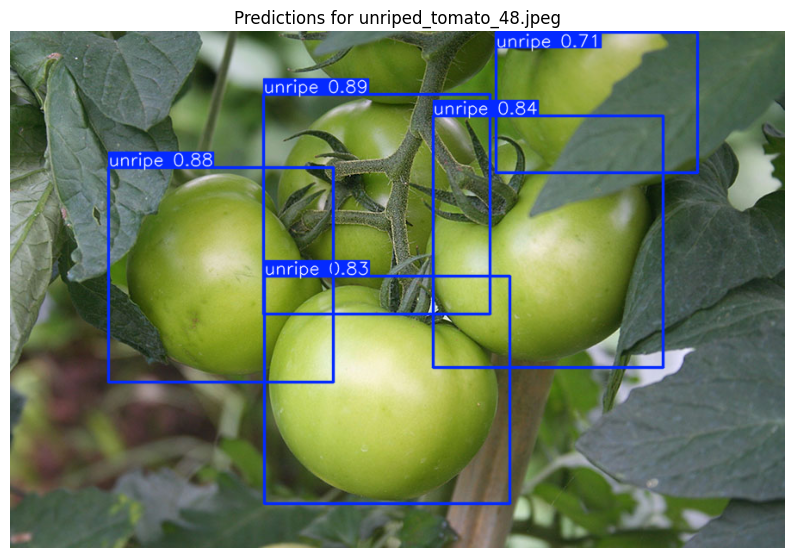


image 1/1 /kaggle/working/images/val/riped_tomato_20.jpeg: 384x640 2 ripes, 85.5ms
Speed: 2.5ms preprocess, 85.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


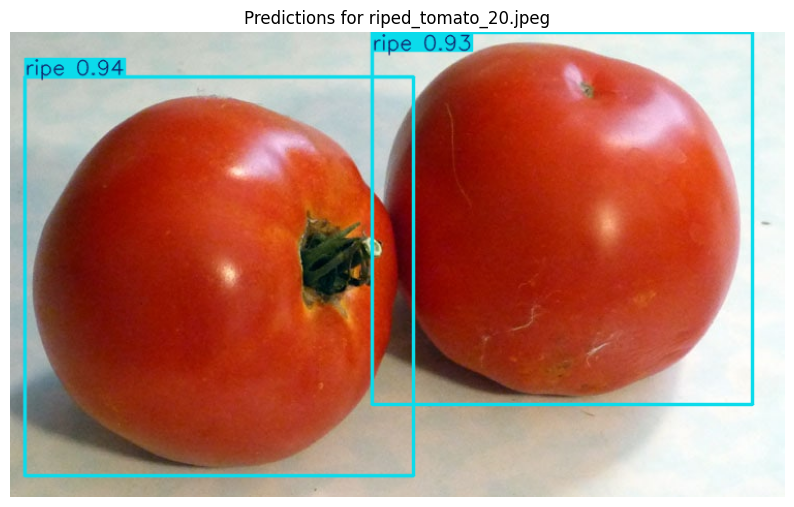


image 1/1 /kaggle/working/images/val/riped_tomato_31.jpeg: 448x640 12 ripes, 7.7ms
Speed: 2.4ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


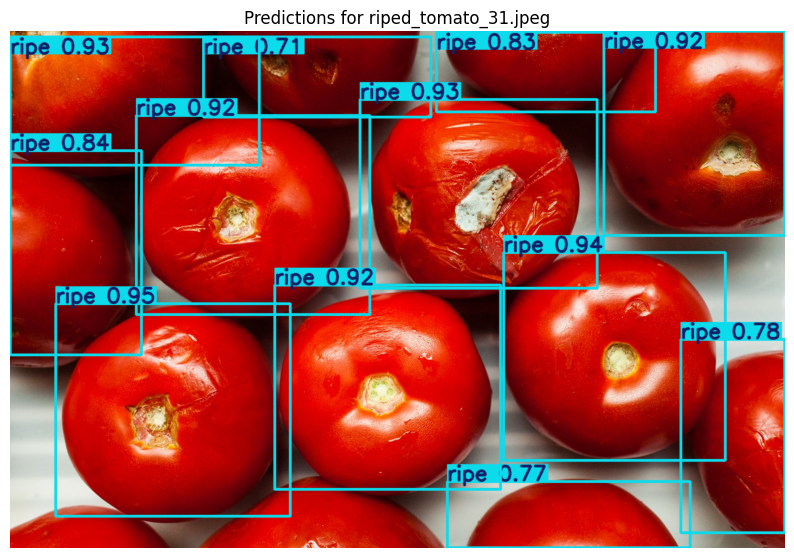


image 1/1 /kaggle/working/images/val/riped_tomato_7.jpeg: 448x640 12 ripes, 7.0ms
Speed: 2.2ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


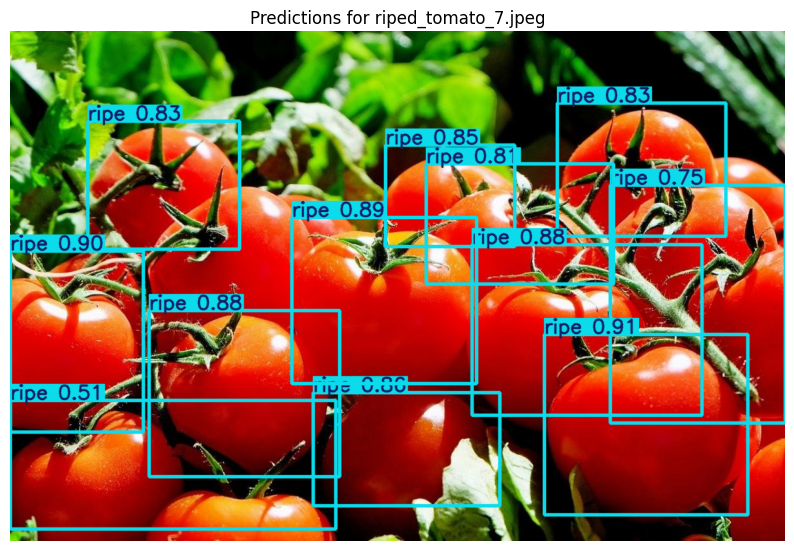


image 1/1 /kaggle/working/images/val/riped_tomato_91.jpeg: 512x640 2 unripes, 2 ripes, 76.5ms
Speed: 2.8ms preprocess, 76.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


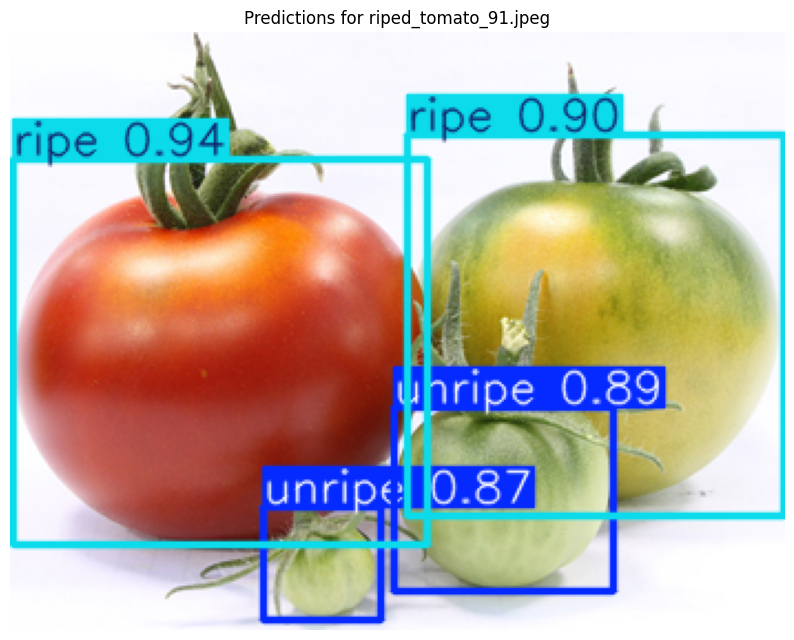

In [10]:
import random
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

# Define the path to the images
images_path = '/kaggle/working/images/val'
num_images = 5

# Sample a subset of images
images = random.sample([f for f in os.listdir(images_path) if f.endswith('.jpeg')], num_images)

# Show the results on test images 
for image in images:
    img_path = os.path.join(images_path, image)
    results = model(img_path, conf=0.5, iou=0.6)
    r = results[0]
    im_array = r.plot()  # plot a BGR numpy array of predictions

    # Convert BGR array to RGB for displaying
    im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(im_rgb)
    plt.title(f'Predictions for {image}')
    plt.axis('off')
    plt.show()